In [176]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score, recall_score,silhouette_score
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer



# TASK 1

In [177]:
df = pd.read_csv("C:\\Users\\zaini\\Downloads\\Stock_data_part1.csv")
df['date'] =pd.to_datetime(df['date'])
df.head()

C:\Users\zaini\AppData\Local\Temp\ipykernel_11900\461601476.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("C:\\Users\\zaini\\Downloads\\Stock_data_part1.csv")


,PERMNO,date,SHRCD,TICKER,COMNAM,PERMCO,BIDLO,ASKHI,PRC,VOL,RET,BID,ASK,SHROUT,OPENPRC,NUMTRD,sprtrn
0,10026,2019-08-20,11.0,JJSF,J & J SNACK FOODS CORP,7976,190.9700,196.74001,191.13000,136698.0,-0.020298,191.00000,191.13000,18841.0,194.70000,1903.0,-0.007915
1,10026,2019-08-21,11.0,JJSF,J & J SNACK FOODS CORP,7976,188.5025,192.56000,189.35001,101583.0,-0.009313,189.17000,189.35001,18841.0,191.98000,2252.0,0.008247
2,10026,2019-08-22,11.0,JJSF,J & J SNACK FOODS CORP,7976,187.9800,190.39000,189.32001,92198.0,-0.000158,189.32001,189.50000,18841.0,188.89999,1805.0,-0.000506
3,10026,2019-08-23,11.0,JJSF,J & J SNACK FOODS CORP,7976,185.5900,190.35001,186.14999,75522.0,-0.016744,186.14000,186.28000,18841.0,189.22000,1629.0,-0.025946
4,10026,2019-08-26,11.0,JJSF,J & J SNACK FOODS CORP,7976,186.7000,191.39999,191.23000,81788.0,0.027290,191.03999,191.25000,18841.0,187.11000,2070.0,0.010983


In [140]:
start_date = '2020-02-14'
end_date = '2020-03-20'
mask = (df['date'] >= start_date) & (df['date'] <= end_date)
filtered_df = df[mask]

In [ ]:
key_variables = ['RET', 'VOL', 'sprtrn', 'BID', 'ASK']
descriptive_stats = filtered_df[key_variables].describe()
print("Descriptive Statistics:")
print(descriptive_stats)
filtered_df['RET'] = pd.to_numeric(filtered_df['RET'], errors='coerce')
filtered_df = filtered_df.dropna(subset=['RET'])
mean_return = filtered_df['RET'].mean()
std_return = filtered_df['RET'].std()
risk_free_rate = 0 

sharpe_ratio = (mean_return - risk_free_rate) / std_return
print("Sharpe Ratio:", sharpe_ratio)

C:\Users\zaini\AppData\Local\Temp\ipykernel_11900\2192586411.py:13: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()


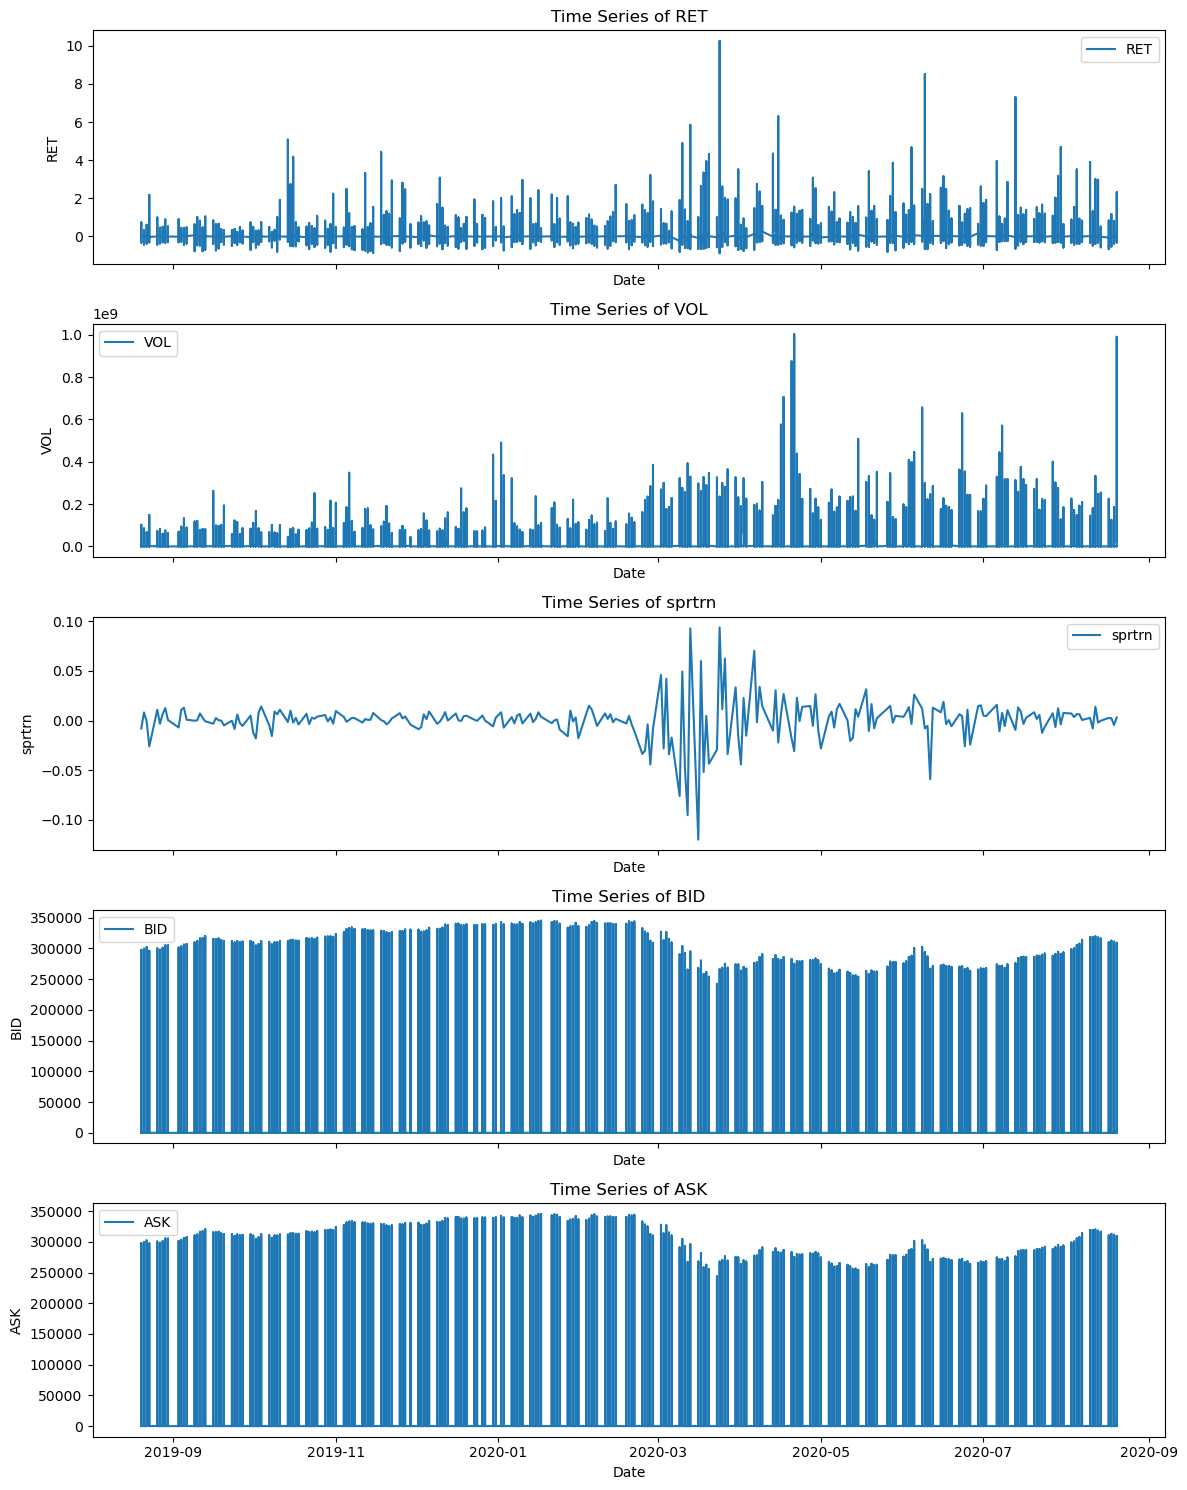

In [142]:
key_variables = ['RET', 'VOL', 'sprtrn', 'BID', 'ASK']
for var in key_variables:
    df[var] = pd.to_numeric(df[var], errors='coerce')
filtered_df = df.dropna(subset=key_variables)
filtered_df = filtered_df.sort_values(by='date')
fig, axs = plt.subplots(len(key_variables), 1, figsize=(12, 15), sharex=True)
for i, var in enumerate(key_variables):
    axs[i].plot(filtered_df['date'], filtered_df[var], label=var)
    axs[i].set_title(f'Time Series of {var}')
    axs[i].set_xlabel('Date')
    axs[i].set_ylabel(var)
    axs[i].legend()
plt.tight_layout()
plt.show()

# TASK2

In [143]:
filtered_df['RET'] = filtered_df.groupby('PERMNO')['PRC'].pct_change()


In [144]:
variables = ['RET', 'VOL', 'sprtrn', 'BID', 'ASK']
regression_df = filtered_df.dropna(subset=variables)
for var in variables:
    regression_df[var] = pd.to_numeric(regression_df[var], errors='coerce')
regression_df = regression_df.dropna()

C:\Users\zaini\AppData\Local\Temp\ipykernel_11900\4250467995.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  regression_df[var] = pd.to_numeric(regression_df[var], errors='coerce')


In [145]:
X = regression_df[['VOL', 'sprtrn', 'BID', 'ASK']]
y = regression_df['RET']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [146]:
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)
model = sm.OLS(y_train, X_train).fit()

In [147]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')


MSE: 0.09643644474577295
RMSE: 0.31054217869038814
MAE: 0.06637952232632251


In [148]:
print(model.summary())
print("Regression Coefficients:")
print(model.params)

                            OLS Regression Results                            
Dep. Variable:                    RET   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     988.8
Date:                Sun, 19 May 2024   Prob (F-statistic):               0.00
Time:                        13:20:33   Log-Likelihood:            -2.1963e+05
No. Observations:              616553   AIC:                         4.393e+05
Df Residuals:                  616548   BIC:                         4.393e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0272      0.000    -56.005      0.0

# TASK3

In [149]:
df['date'] = pd.to_datetime(df['date'])
start_date = '2020-02-14'
end_date = '2020-03-20'
filtered_df = df[(df['date'] >= start_date) & (df['date'] <= end_date)]


In [150]:
filtered_df['price_increase'] = (filtered_df['PRC'] > filtered_df['PRC'].shift()).astype(int)

C:\Users\zaini\AppData\Local\Temp\ipykernel_11900\4282313606.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['price_increase'] = (filtered_df['PRC'] > filtered_df['PRC'].shift()).astype(int)


In [151]:
variables = ['VOL', 'sprtrn', 'BID', 'ASK']
regression_df = filtered_df.dropna(subset=variables + ['price_increase'])
for var in variables:
    regression_df[var] = pd.to_numeric(regression_df[var], errors='coerce')
regression_df = regression_df.dropna()

C:\Users\zaini\AppData\Local\Temp\ipykernel_11900\1406676431.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  regression_df[var] = pd.to_numeric(regression_df[var], errors='coerce')


In [152]:
X = regression_df[['VOL', 'sprtrn', 'BID', 'ASK']]
y = regression_df['price_increase']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [153]:
model = sm.Probit(y_train, X_train).fit()


Optimization terminated successfully.
         Current function value: 0.555442
         Iterations 6


In [154]:
y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
print(f'Accuracy: {accuracy}')
print(f'Recall: {recall}')

Accuracy: 0.746177370030581
Recall: 0.5799134199134199


In [155]:
print(model.summary())
print("Regression Coefficients:")
print(model.params)


                          Probit Regression Results                           
Dep. Variable:         price_increase   No. Observations:                61472
Model:                         Probit   Df Residuals:                    61468
Method:                           MLE   Df Model:                            3
Date:                Sun, 19 May 2024   Pseudo R-squ.:                  0.1627
Time:                        13:20:34   Log-Likelihood:                -34144.
converged:                       True   LL-Null:                       -40778.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
VOL         3.419e-10   1.01e-09      0.338      0.735   -1.64e-09    2.33e-09
sprtrn        15.3521      0.133    115.383      0.000      15.091      15.613
BID           -0.0066      0.007     -0.941      0.3

Conclusion:
The market return (sprtrn) has a significant positive effect on the probability of a price increase, indicating that securities tend to increase in price when the overall market performs well.
However, volume (VOL), bid price (BID), and ask price (ASK) do not show statistically significant effects on the probability of a price increase within the specified period.

# TASK 4 START HERE ON DATASET 2

In [156]:
df = pd.read_csv("C:\\Users\\zaini\\Downloads\\Stock_data_part2.csv")


In [157]:
df.head()

,public_date,CAPEI,bm,evm,pe_exi,dpr,npm,roa,roe,roce,ptb,divyield,TICKER
0,31/01/2010,17.934,1.077,7.981,16.433,0.0,0.041,0.095,0.079,0.099,1.152,NaN,AIR
1,28/02/2010,17.554,1.077,7.981,16.085,0.0,0.041,0.095,0.079,0.099,1.128,NaN,AIR
2,31/03/2010,19.257,1.077,7.981,17.603,0.0,0.041,0.095,0.079,0.099,1.237,NaN,AIR
3,30/04/2010,18.304,0.898,9.293,19.349,0.0,0.037,0.086,0.067,0.097,1.197,NaN,AIR
4,31/05/2010,14.791,0.898,9.293,15.635,0.0,0.037,0.086,0.067,0.097,0.968,NaN,AIR


In [158]:
print(df.head())
print(df.isnull().sum())
df['public_date'] = pd.to_datetime(df['public_date'], format='%d/%m/%Y')
features = ['CAPEI', 'bm', 'evm', 'pe_exi', 'dpr', 'npm', 'roa', 'roe', 'roce', 'ptb', 'divyield']
X = df[features]
print("Shape of feature matrix:", X.shape)

  public_date   CAPEI     bm    evm  pe_exi  dpr    npm    roa    roe   roce  \
0  31/01/2010  17.934  1.077  7.981  16.433  0.0  0.041  0.095  0.079  0.099   
1  28/02/2010  17.554  1.077  7.981  16.085  0.0  0.041  0.095  0.079  0.099   
2  31/03/2010  19.257  1.077  7.981  17.603  0.0  0.041  0.095  0.079  0.099   
3  30/04/2010  18.304  0.898  9.293  19.349  0.0  0.037  0.086  0.067  0.097   
4  31/05/2010  14.791  0.898  9.293  15.635  0.0  0.037  0.086  0.067  0.097   

     ptb divyield TICKER  
0  1.152      NaN    AIR  
1  1.128      NaN    AIR  
2  1.237      NaN    AIR  
3  1.197      NaN    AIR  
4  0.968      NaN    AIR  
public_date         0
CAPEI           31354
bm              30031
evm              6784
pe_exi          19343
dpr            202247
npm             29690
roa              8180
roe             39717
roce            10888
ptb             30031
divyield       363389
TICKER           9971
dtype: int64
Shape of feature matrix: (577832, 11)


public_date         0
CAPEI           31354
bm              30031
evm              6784
pe_exi          19343
dpr            202247
npm             29690
roa              8180
roe             39717
roce            10888
ptb             30031
divyield       363389
TICKER           9971
dtype: int64
Shape of feature matrix: (577832, 11)
### Preprocess Data ###
Data after preprocessing:
    public_date   CAPEI     bm     evm  pe_exi    dpr    npm    roa    roe  \
15  2011-04-30  17.867  0.806  10.716  17.132  0.000  0.036  0.082  0.074   
16  2011-05-31  18.107  0.806  10.716  17.362  0.000  0.036  0.082  0.074   
17  2011-06-30  18.588  0.806  10.716  17.822  0.000  0.036  0.082  0.074   
18  2011-07-31  17.452  0.890   7.609  16.210  0.042  0.041  0.123  0.084   
19  2011-08-31  14.032  0.890   7.609  13.033  0.042  0.041  0.123  0.084   

     roce    ptb  divyield TICKER  
15  0.104  1.184    0.0115    AIR  
16  0.104  1.200    0.0114    AIR  
17  0.104  1.231    0.0111    AIR  
18  0

C:\Users\zaini\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\zaini\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\zaini\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\zaini\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

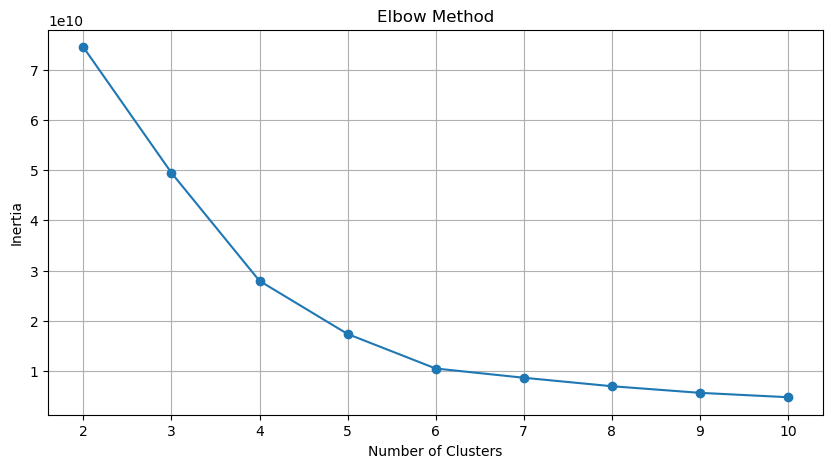

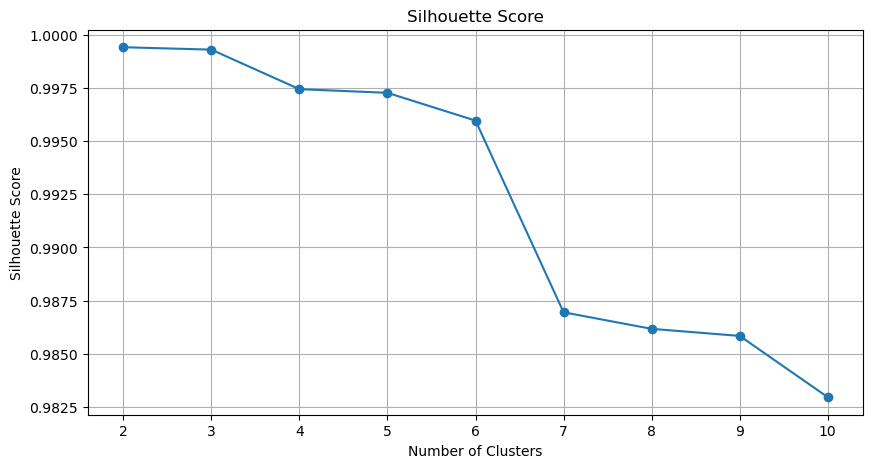

Optimal number of clusters chosen: 3
### Perform K-means Clustering ###


C:\Users\zaini\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


### Summary of Cluster Characteristics ###


C:\Users\zaini\AppData\Local\Temp\ipykernel_11900\3771271141.py:43: FutureWarning: ['TICKER'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  cluster_summary = df.groupby('Cluster').agg(['mean', 'median']).transpose()


Cluster                                         0                    1  \
public_date mean    2016-06-22 10:50:30.545690624  2013-12-31 00:00:00   
            median            2016-05-31 00:00:00  2013-12-31 00:00:00   
CAPEI       mean                        22.026694        220207.333333   
            median                         20.679             224540.0   
bm          mean                         0.640088                0.905   
            median                          0.584                0.905   
evm         mean                        11.770096               12.135   
            median                         10.356               12.135   
pe_exi      mean                        23.142014            13.772667   
            median                         17.563               13.983   
dpr         mean                         0.766507                  0.0   
            median                          0.365                  0.0   
npm         mean                      

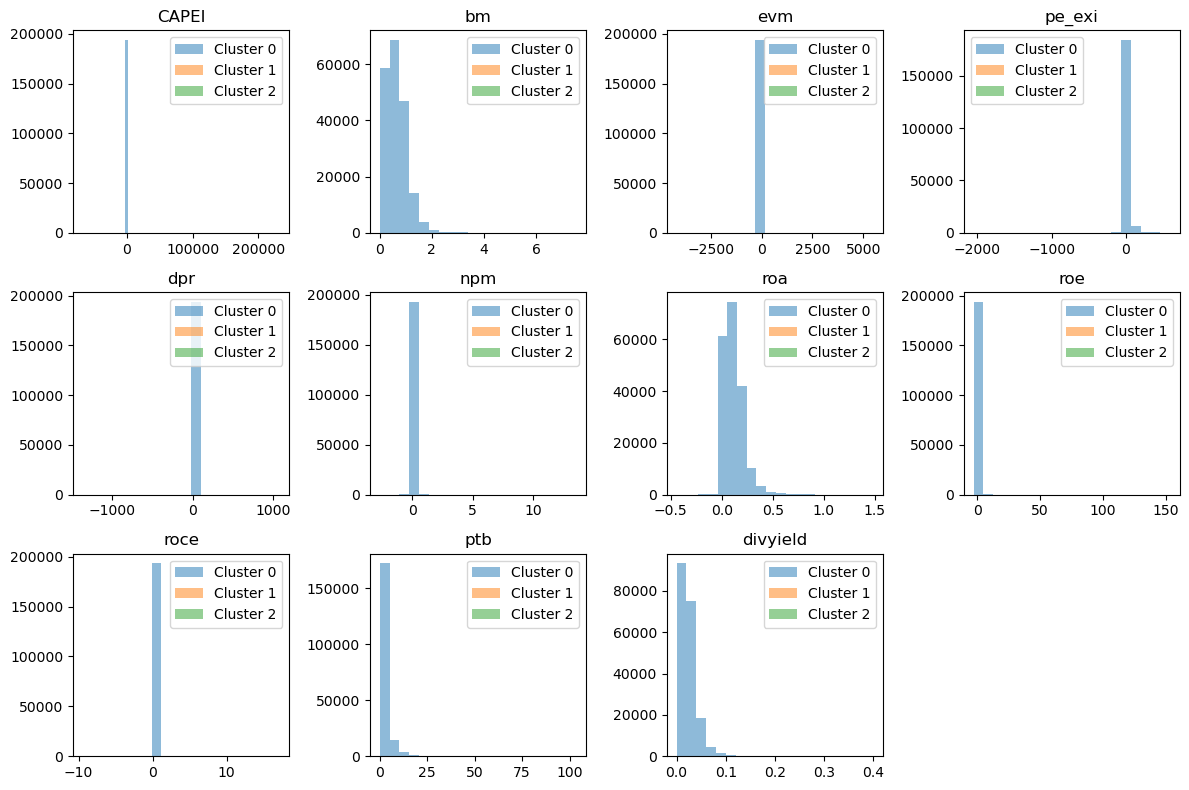

In [159]:
df = pd.read_csv("C:\\Users\\zaini\\Downloads\\Stock_data_part2.csv")
print(df.isnull().sum())
df['public_date'] = pd.to_datetime(df['public_date'], format='%d/%m/%Y')
features = ['CAPEI', 'bm', 'evm', 'pe_exi', 'dpr', 'npm', 'roa', 'roe', 'roce', 'ptb', 'divyield']
X = df[features]
print("Shape of feature matrix:", X.shape)
print("### Preprocess Data ###")
df['divyield'] = df['divyield'].apply(lambda x: float(x.strip('%')) / 100 if isinstance(x, str) else x)
df.dropna(inplace=True)
print("Data after preprocessing:\n", df.head())
X = df[['CAPEI', 'bm', 'evm', 'pe_exi', 'dpr', 'npm', 'roa', 'roe', 'roce', 'ptb', 'divyield']]
print("### Finding Optimal Number of Clusters ###")
inertia = []
silhouette_scores = []
max_clusters = 10
for k in range(2, max_clusters + 1):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X, kmeans.labels_))
plt.figure(figsize=(10, 5))
plt.plot(range(2, max_clusters + 1), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.xticks(range(2, max_clusters + 1))
plt.grid(True)
plt.show()
plt.figure(figsize=(10, 5))
plt.plot(range(2, max_clusters + 1), silhouette_scores, marker='o')
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.xticks(range(2, max_clusters + 1))
plt.grid(True)
plt.show()
print("Optimal number of clusters chosen: 3")
print("### Perform K-means Clustering ###")
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
df['Cluster'] = kmeans.labels_
print("### Summary of Cluster Characteristics ###")
cluster_summary = df.groupby('Cluster').agg(['mean', 'median']).transpose()
print(cluster_summary)
print("### Sizes of Each Cluster ###")
cluster_sizes = df['Cluster'].value_counts()
print(cluster_sizes)
print("### Visualizations: Cluster Distributions ###")
plt.figure(figsize=(12, 8))
for i, feature in enumerate(X.columns):
    plt.subplot(3, 4, i + 1)
    for cluster in range(3):
        plt.hist(df[df['Cluster'] == cluster][feature], bins=20, alpha=0.5, label=f'Cluster {cluster}')
    plt.title(feature)
    plt.legend()
plt.tight_layout()
plt.show()


### Cluster Profiling: Composition of Each Cluster ###


C:\Users\zaini\AppData\Local\Temp\ipykernel_11900\2284823102.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_means = df.groupby('Cluster').mean()


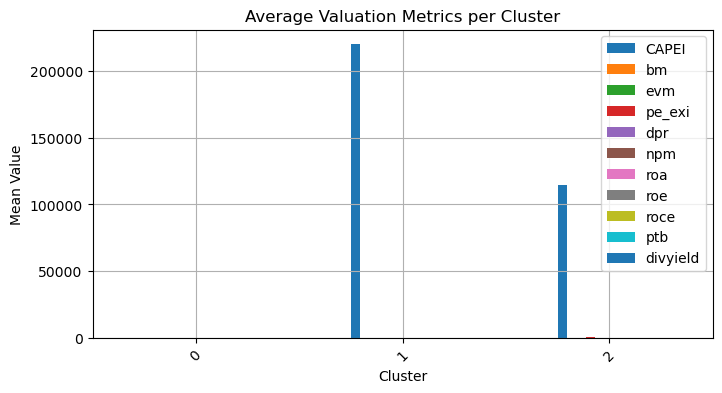

In [160]:
print("### Cluster Profiling: Composition of Each Cluster ###")

cluster_means = df.groupby('Cluster').mean()
cluster_means.plot(kind='bar', figsize=(8, 4))
plt.title('Average Valuation Metrics per Cluster')
plt.ylabel('Mean Value')
plt.xlabel('Cluster')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()



In [161]:
print("### Interpretation and Analysis ###")
print("### Valuation Insights ###")
for cluster in range(3):
    print(f"Cluster {cluster} Insights:")
    cluster_data = df[df['Cluster'] == cluster]
    print(f"Average P/E: {cluster_data['pe_exi'].mean():.2f}")
    print(f"Average Dividend Yield: {cluster_data['divyield'].mean():.2f}")
    print(f"Other key metrics: ROE: {cluster_data['roe'].mean():.2f}, ROA: {cluster_data['roa'].mean():.2f}, etc.")
    print("\n")


### Interpretation and Analysis ###
### Valuation Insights ###
Cluster 0 Insights:
Average P/E: 23.14
Average Dividend Yield: 0.02
Other key metrics: ROE: 0.17, ROA: 0.12, etc.


Cluster 1 Insights:
Average P/E: 13.77
Average Dividend Yield: 0.01
Other key metrics: ROE: 0.09, ROA: 0.06, etc.


Cluster 2 Insights:
Average P/E: 35.58
Average Dividend Yield: 0.01
Other key metrics: ROE: 0.26, ROA: 0.09, etc.




### Temporal Stability ###


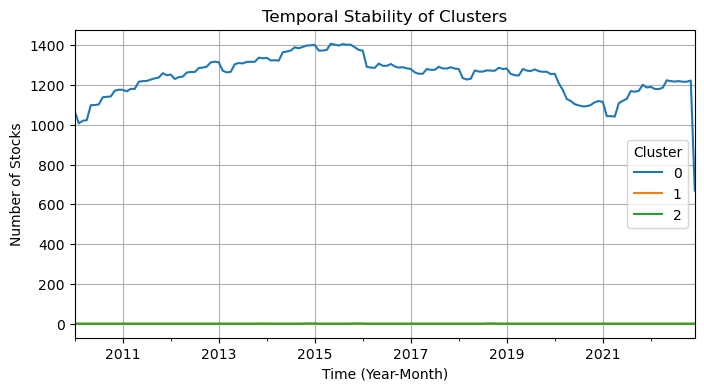

In [162]:
print("### Temporal Stability ###")
df['public_date'] = pd.to_datetime(df['public_date'])
df['YearMonth'] = df['public_date'].dt.to_period('M')
temporal_cluster_counts = df.groupby(['YearMonth', 'Cluster']).size().unstack().fillna(0)
temporal_cluster_counts.plot(kind='line', figsize=(8, 4))
plt.title('Temporal Stability of Clusters')
plt.xlabel('Time (Year-Month)')
plt.ylabel('Number of Stocks')
plt.grid(True)
plt.show()

In [163]:
print("### Investment Implications ###")
date_1 = '2020-01-31'
date_2 = '2020-06-30'

df_date_1 = df[df['public_date'] == date_1]
df_date_2 = df[df['public_date'] == date_2]

print("Investment Recommendations for 31/01/2020:")
for cluster in range(3):
    print(f"Cluster {cluster}:")
    cluster_stocks = df_date_1[df_date_1['Cluster'] == cluster]
    print(cluster_stocks[['TICKER', 'pe_exi', 'divyield']])

print("\nInvestment Recommendations for 30/06/2020:")
for cluster in range(3):
    print(f"Cluster {cluster}:")
    cluster_stocks = df_date_2[df_date_2['Cluster'] == cluster]
    print(cluster_stocks[['TICKER', 'pe_exi', 'divyield']])


### Investment Implications ###
Investment Recommendations for 31/01/2020:
Cluster 0:
       TICKER   pe_exi  divyield
120       AIR   16.377    0.0071
599       AVX   14.796    0.0227
721       PNW   22.002    0.0320
877       AAN   20.399    0.0027
1033      ABT   47.359    0.0165
...       ...      ...       ...
574070   SNDR   22.495    0.0108
574851    GHL -174.000    0.0128
575740    CNS   28.786    0.0465
576879     FF   27.400    0.0219
577558    ACA   17.857    0.0046

[1256 rows x 3 columns]
Cluster 1:
Empty DataFrame
Columns: [TICKER, pe_exi, divyield]
Index: []
Cluster 2:
Empty DataFrame
Columns: [TICKER, pe_exi, divyield]
Index: []

Investment Recommendations for 30/06/2020:
Cluster 0:
       TICKER   pe_exi  divyield
125       AIR   10.937    0.0145
726       PNW   14.988    0.0427
882       AAN  100.889    0.0035
1038      ABT   46.177    0.0157
1324      ACU   13.360    0.0209
...       ...      ...       ...
574856    GHL   13.320    0.0200
575585   CZWI    6.929    0.

In [164]:
print("\nDifferences in Recommendations:")
for cluster in range(3):
    stocks_date_1 = set(df_date_1[df_date_1['Cluster'] == cluster]['TICKER'])
    stocks_date_2 = set(df_date_2[df_date_2['Cluster'] == cluster]['TICKER'])
    new_stocks = stocks_date_2 - stocks_date_1
    dropped_stocks = stocks_date_1 - stocks_date_2
    print(f"Cluster {cluster}:")
    print(f"New stocks on 30/06/2020: {new_stocks}")
    print(f"Dropped stocks since 31/01/2020: {dropped_stocks}")
    print("\n")


Differences in Recommendations:
Cluster 0:
New stocks on 30/06/2020: {'PVBC', 'HESM', 'J', 'VIACA', 'MAXR', 'SPFI', 'TFC', 'SSTK', 'WINA', 'NWL', 'LM', 'CAL', 'MTEX', 'COFS', 'PIPR', 'CURO', 'LNC', 'BSVN', 'VRS', 'MCBS', 'HMST', 'AC', 'BRBS', 'AHC', 'RRBI', 'ZBH', 'NL', 'OBCI', 'JCS', 'EIX', 'KHC', 'PCTI', 'BKR', 'PTVCB', 'NLOK', 'TW', 'HBT', 'CL', 'ASTE', 'MGM', 'WTRG', 'FHI', 'GHM', 'RXN', 'CTVA', 'LYTS', 'COWN', 'CTL', 'CCAP', 'GE', 'COKE', 'SPKE', 'MNRL', 'CZWI', 'NRG'}
Dropped stocks since 31/01/2020: {'TXRH', 'ETRN', 'BBX', 'JLL', 'BRY', 'SGB', 'NEWM', 'BJRI', 'SABR', 'CHS', 'BTU', 'AVX', 'TJX', 'PFIN', 'CBRL', 'QUAD', 'EVC', 'HNRG', 'LOGM', 'DD', 'BELFA', 'GVA', 'WYNN', 'PEGA', 'ALGT', 'TGE', 'CTRN', 'ALOT', 'OUT', 'XEC', 'TERP', 'KAR', 'SHOO', 'CRI', 'MAR', 'CLR', 'NRC', 'ROST', 'SM', 'PJC', 'TESS', 'RGLD', 'RMCF', 'BHGE', 'PLCE', 'PAG', 'BGCP', 'UCFC', 'AVD', 'DRI', 'JW', 'WETF', 'MDP', 'SSP', 'MINI', 'TEX', 'BGFV', 'LZB', 'DOW', 'JWN', 'CBS', 'PEGI', 'PATI', 'CWH', 'KSS', 'E

# TASK5 on Dataset Stock_data_3

In [165]:
stock_data = pd.read_csv('C:\\Users\\zaini\\Downloads\\Stock_data_part3.csv')
stock_data.head()

,PERMNO,date,SHRCD,TICKER,PERMCO,CUSIP,HSICIG,PRC,VOL,RET,SHROUT,SPREAD
0,10001,2010-01-29,11.0,EGAS,7953,36720410,NaN,10.0600,3104.0,-0.018932,4361.0,NaN
1,10001,2010-02-26,11.0,EGAS,7953,36720410,NaN,10.0084,1510.0,-0.000656,4361.0,NaN
2,10001,2010-03-31,11.0,EGAS,7953,36720410,NaN,10.1700,2283.0,0.020643,4361.0,NaN
3,10001,2010-04-30,11.0,EGAS,7953,36720410,NaN,11.3900,3350.0,0.124385,6070.0,NaN
4,10001,2010-05-28,11.0,EGAS,7953,36720410,NaN,11.4000,3451.0,0.004829,6071.0,NaN


In [166]:
ff_factors = pd.read_csv('C:\\Users\\zaini\\Downloads\\F_Research_Data_Factors_daily_CSV\\F_Research_Data_Factors_daily.CSV')
ff_factors.head()

,coloumn1,Mkt-RF,SMB,HML,RF
0,19260701,0.10,-0.25,-0.27,0.009
1,19260702,0.45,-0.33,-0.06,0.009
2,19260706,0.17,0.30,-0.39,0.009
3,19260707,0.09,-0.58,0.02,0.009
4,19260708,0.21,-0.38,0.19,0.009


In [167]:
stock_data = pd.read_csv('C:\\Users\\zaini\\Downloads\\Stock_data_part3.csv')
ff_factors = pd.read_csv('C:\\Users\\zaini\\Downloads\\F_Research_Data_Factors_daily_CSV\\F_Research_Data_Factors_daily.CSV')
ff_factors.rename(columns={'coloumn1': 'Date'}, inplace=True)
ff_factors['Date'] = pd.to_datetime(ff_factors['Date'], format='%Y%m%d')
print('ffdone')
sp500 = pd.read_csv('C:\\Users\\zaini\\Downloads\\sp500.csv')
sp500['Date'] = pd.to_datetime(sp500['Date'], format='%d.%m.%Y')
print('sp500 done')
treasury_yields = pd.read_csv('C:\\Users\\zaini\\Downloads\\DGS10.csv')
treasury_yields['DATE'] = pd.to_datetime(treasury_yields['DATE'])


ffdone
sp500 done


ffdone
sp500 done


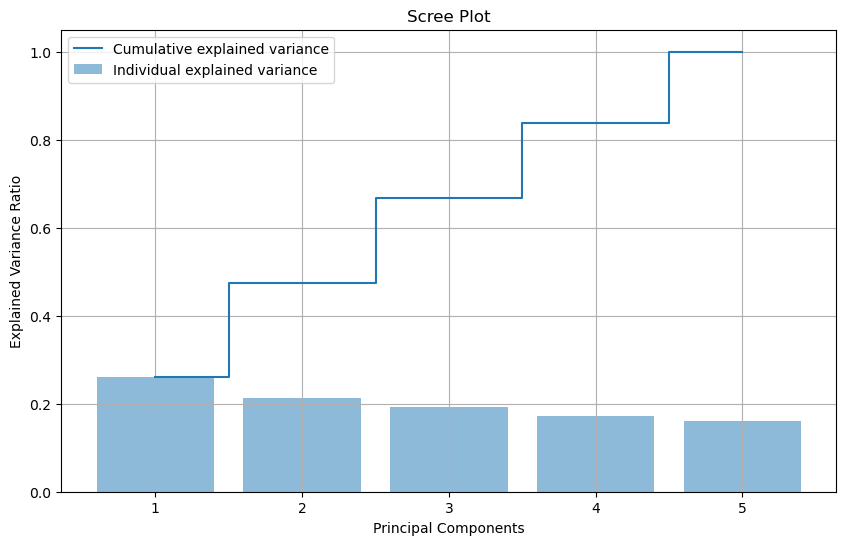

Factor Loadings:
             PC1       PC2       PC3       PC4       PC5
RET     0.063565  0.840276  0.124638  0.337639  0.400451
Mkt-RF -0.521383  0.313807 -0.029380 -0.787026  0.097015
SMB    -0.468533 -0.392479  0.514799  0.204374  0.565376
HML     0.584379 -0.184888 -0.196837 -0.371006  0.669274
RF     -0.403854 -0.085073 -0.824524  0.295255  0.250299


In [168]:
stock_data = pd.read_csv('C:\\Users\\zaini\\Downloads\\Stock_data_part3.csv')
stock_data['date'] = pd.to_datetime(stock_data['date'])  # Convert 'date' column to datetime format
ff_factors = pd.read_csv('C:\\Users\\zaini\\Downloads\\F_Research_Data_Factors_daily_CSV\\F_Research_Data_Factors_daily.CSV')
ff_factors.rename(columns={'coloumn1': 'Date'}, inplace=True)
ff_factors['Date'] = pd.to_datetime(ff_factors['Date'], format='%Y%m%d')
print('ffdone')
sp500 = pd.read_csv('C:\\Users\\zaini\\Downloads\\sp500.csv')
sp500['Date'] = pd.to_datetime(sp500['Date'], format='%d.%m.%Y')
print('sp500 done')
merged_data = pd.merge(stock_data, ff_factors, how='inner', left_on='date', right_on='Date')
merged_data.drop(['Date'], axis=1, inplace=True)
merged_data = merged_data[pd.to_numeric(merged_data['RET'], errors='coerce').notnull()]
X = merged_data[['RET', 'Mkt-RF', 'SMB', 'HML', 'RF']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X_scaled)

pca = PCA()
pca.fit(X_imputed)
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, where='mid', label='Cumulative explained variance')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.legend()
plt.grid()
plt.show()

factor_loadings = pd.DataFrame(pca.components_.T, columns=[f'PC{i}' for i in range(1, len(explained_variance_ratio) + 1)], index=X.columns)
print("Factor Loadings:")
print(factor_loadings)

In [169]:

df = pd.read_csv('C:\\Users\\zaini\\Downloads\\Stock_data_part3.csv')
df['date'] = pd.to_datetime(df['date'])
non_numeric_columns = ["PERMNO", "date", "TICKER", "PERMCO", "CUSIP", "HSICIG", "SPREAD"]
numeric_df = df.drop(columns=non_numeric_columns)

numeric_df['RET'] = pd.to_numeric(numeric_df['RET'], errors='coerce')
numeric_df = numeric_df.dropna()
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_df)
pca = PCA()
pca.fit(scaled_data)

loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

for i in range(len(pca.explained_variance_ratio_)):
    print(f"Principal Component {i+1}:")
    print("Interpretation:")
    for j in range(len(loadings)):
        if abs(loadings[j][i]) > 0.5: 
            print(f"- Influenced by {numeric_df.columns[j]} ({loadings[j][i]:.2f})")
    print()


Principal Component 1:
Interpretation:
- Influenced by VOL (0.88)
- Influenced by SHROUT (0.89)

Principal Component 2:
Interpretation:
- Influenced by PRC (0.77)
- Influenced by RET (0.51)

Principal Component 3:
Interpretation:
- Influenced by PRC (-0.53)
- Influenced by RET (0.84)

Principal Component 4:
Interpretation:
- Influenced by SHRCD (0.90)

Principal Component 5:
Interpretation:



In [170]:

stock_data = pd.read_csv('C:\\Users\\zaini\\Downloads\\Stock_data_part3.csv')
stock_data['date'] = pd.to_datetime(stock_data['date'])
ff_factors = pd.read_csv('C:\\Users\\zaini\\Downloads\\F_Research_Data_Factors_daily_CSV\\F_Research_Data_Factors_daily.CSV')
ff_factors.rename(columns={'coloumn1': 'Date'}, inplace=True)
ff_factors['Date'] = pd.to_datetime(ff_factors['Date'], format='%Y%m%d')
merged_data = pd.merge(stock_data, ff_factors, how='inner', left_on='date', right_on='Date')
merged_data.drop(['Date'], axis=1, inplace=True)
merged_data = merged_data[pd.to_numeric(merged_data['RET'], errors='coerce').notnull()]
X = merged_data[['RET', 'Mkt-RF', 'SMB', 'HML', 'RF']]  # Add more columns if needed

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X_scaled)

pca = PCA()
pca.fit(X_imputed)

explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

print("# Implications for Monthly Returns")
for i in range(len(explained_variance_ratio)):
    pc_num = i + 1
    column_name = factor_loadings.columns[i]
    max_loading_index = factor_loadings.index[factor_loadings[factor_loadings.columns[i]].argmax()]
    max_loading_value = factor_loadings[factor_loadings.columns[i]].max()
    print(f"# Principal Component {pc_num}: {column_name}, Max Loading: {max_loading_index} ({max_loading_value:.4f})")


# Implications for Monthly Returns
# Principal Component 1: PC1, Max Loading: HML (0.5844)
# Principal Component 2: PC2, Max Loading: RET (0.8403)
# Principal Component 3: PC3, Max Loading: SMB (0.5148)
# Principal Component 4: PC4, Max Loading: RET (0.3376)
# Principal Component 5: PC5, Max Loading: HML (0.6693)


# TASK6


In [172]:
stock_data = pd.read_csv('C:\\Users\\zaini\\Downloads\\Stock_data_part3.csv')
stock_data['date'] = pd.to_datetime(stock_data['date'])


In [173]:
stock_data.head()

,PERMNO,date,SHRCD,TICKER,PERMCO,CUSIP,HSICIG,PRC,VOL,RET,SHROUT,SPREAD
0,10001,2010-01-29,11.0,EGAS,7953,36720410,NaN,10.0600,3104.0,-0.018932,4361.0,NaN
1,10001,2010-02-26,11.0,EGAS,7953,36720410,NaN,10.0084,1510.0,-0.000656,4361.0,NaN
2,10001,2010-03-31,11.0,EGAS,7953,36720410,NaN,10.1700,2283.0,0.020643,4361.0,NaN
3,10001,2010-04-30,11.0,EGAS,7953,36720410,NaN,11.3900,3350.0,0.124385,6070.0,NaN
4,10001,2010-05-28,11.0,EGAS,7953,36720410,NaN,11.4000,3451.0,0.004829,6071.0,NaN


In [174]:

market_maker_data = pd.read_csv("C:\\Users\\zaini\\Downloads\\FINRA_CHX_MKTQUALITYSTATS_201610.dat")

with open(file_path, 'r') as file:
    lines = file.readlines()

data = []
for line in lines:
    line_data = line.strip().split("|")
    data.append(line_data)
market_maker_data = pd.DataFrame(data[3:], columns=data[1])
stock_market_data = pd.read_csv('C:\\Users\\zaini\\Downloads\\Stock_data_part3.csv')
try:
    market_maker_data['Date'] = pd.to_datetime(market_maker_data['Date'])
    print('market done')
    stock_market_data['date'] = pd.to_datetime(stock_market_data['date'])
except Exception as e:
    print("Error occurred while converting date columns to datetime format:", e)
merged_data = pd.merge(market_maker_data, stock_market_data, left_on=['Symbol', 'Date'], right_on=['TICKER', 'date'], how='inner')
if 'SPREAD' not in merged_data.columns:
    print("Error: 'SPREAD' column not found in the merged dataset.")
else:
    merged_data.dropna(inplace=True)
    merged_data['MM_Buy_Ct'] = pd.to_numeric(merged_data['MM_Buy_Ct'], errors='coerce')
    merged_data['MM_Sell_Ct'] = pd.to_numeric(merged_data['MM_Sell_Ct'], errors='coerce')
    merged_data['SPREAD'] = pd.to_numeric(merged_data['SPREAD'], errors='coerce')
    num_observations = len(merged_data)
    print("Number of observations in the merged dataset:", num_observations)
    if num_observations < 2:
        print("Insufficient data for regression analysis.")
    else:
        X = merged_data[['MM_Buy_Ct', 'MM_Sell_Ct']]
        X = sm.add_constant(X) 
        y = merged_data['SPREAD']
        model = sm.OLS(y, X).fit()
        print(model.summary())


market done
Number of observations in the merged dataset: 0
Insufficient data for regression analysis.


In [175]:

merged_data = pd.read_csv('C:\\Users\\zaini\\merged_market_maker_data.csv')
stock_data_part3 = pd.read_csv('C:\\Users\\zaini\\Downloads\\Stock_data_part3.csv')
market_maker_data['Date'] = pd.to_datetime(market_maker_data['Date'], format='%Y%m%d', errors='coerce')
stock_data_part3['date'] = pd.to_datetime(stock_data_part3['date'], format='%Y-%m-%d', errors='coerce')
merged_df = pd.merge(market_maker_data, stock_data_part3, how='inner', left_on=['Date', 'Symbol'], right_on=['date', 'TICKER'])

merged_df['Symbol'] = merged_df['Symbol'].astype(str)

cols_to_convert = merged_df.columns.difference(['Date', 'Symbol', 'date', 'TICKER'])
merged_df[cols_to_convert] = merged_df[cols_to_convert].apply(pd.to_numeric, errors='coerce')

required_cols = ['RET', 'MM_Buy_Ct', 'MM_Sell_Ct', 'Share_Prtcp_Buy', 'Share_Prtcp_Sell']
merged_df = merged_df.dropna(subset=required_cols)

y = merged_df['RET']
X = merged_df[['MM_Buy_Ct', 'MM_Sell_Ct', 'Share_Prtcp_Buy', 'Share_Prtcp_Sell']]

X = sm.add_constant(X)

if X.empty or y.empty:
    raise ValueError("The dataset contains no valid data for regression after cleaning.")

model = sm.OLS(y, X).fit()

print(model.summary())
print("Regression Coefficients:")
print(model.params)
significant_vars = model.pvalues[model.pvalues < 0.05].index

print("\nSignificant Independent Variables:")
print(model.params[significant_vars])
affected_securities = significant_vars.difference(['const'])
print("\nSecurities Associated with Significant Variables:")
print(affected_securities)

                            OLS Regression Results                            
Dep. Variable:                    RET   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     3.256
Date:                Sun, 19 May 2024   Prob (F-statistic):             0.0114
Time:                        14:44:09   Log-Likelihood:                 1006.2
No. Observations:                1710   AIC:                            -2002.
Df Residuals:                    1705   BIC:                            -1975.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0408      0.007  